In [1]:
import pandas as pd

In [35]:
df = pd.read_csv("../data/graz_don_bosco_no.csv")

In [38]:
df.head()

Datum        Wert          NO
0  02.01.20   55.723736   55.723736
1  03.01.20  149.482700  149.482700
2  04.01.20  201.862840  201.862840
3  05.01.20  123.441140  123.441140
4  06.01.20   20.640348   20.640348

In [4]:
df_temparature = pd.read_csv("../data/graz_don_bosc_airTemp.csv") 

In [5]:
df_temparature.head()

Datum      Wert
0  02.01.20  0.148477
1  03.01.20 -0.419209
2  04.01.20 -0.497192
3  05.01.20  1.596898
4  06.01.20  3.094656

In [37]:
df['NO']=df['Wert']

In [39]:
df['temperature']=df_temparature['Wert']

In [15]:
df.shape

(287,)

In [12]:
look_back = 30 #m
test_days = 30 #n

In [40]:
df=df[['NO']]

In [44]:
df

NO      NO-30      NO-29       NO-28       NO-27       NO-26  \
0     55.723736        NaN        NaN         NaN         NaN         NaN   
1    149.482700        NaN        NaN         NaN         NaN         NaN   
2    201.862840        NaN        NaN         NaN         NaN         NaN   
3    123.441140        NaN        NaN         NaN         NaN         NaN   
4     20.640348        NaN        NaN         NaN         NaN         NaN   
5     49.834843        NaN        NaN         NaN         NaN         NaN   
6    159.331420        NaN        NaN         NaN         NaN         NaN   
7    170.937820        NaN        NaN         NaN         NaN         NaN   
8    163.492340        NaN        NaN         NaN         NaN         NaN   
9    154.740740        NaN        NaN         NaN         NaN         NaN   
10    94.813470        NaN        NaN         NaN         NaN         NaN   
11    65.444450        NaN        NaN         NaN         NaN         NaN   
12   165.152630        NaN        NaN         NaN         NaN         NaN   
13    46.321360        NaN        NaN         NaN         NaN         NaN   
14    52.072920        NaN        NaN         NaN         NaN         NaN   
15   110.130104        NaN        NaN         NaN         NaN         NaN   
16    76.463630        NaN        NaN         NaN         NaN         NaN   
17    30.362616        NaN        NaN         NaN         NaN         NaN   
18    39.053665        NaN        NaN         NaN         NaN         NaN   
19    83.413690        NaN        NaN         NaN         NaN         NaN   
20   121.594955        NaN        NaN         NaN         NaN         NaN   
21   103.540470        NaN        NaN         NaN         NaN         NaN   
22   106.416046        NaN        NaN         NaN         NaN         NaN   
23    69.035410        NaN        NaN         NaN         NaN         NaN   
24    62.674540        NaN        NaN         NaN         NaN         NaN   
25    30.779144        NaN        NaN         NaN         NaN         NaN   
26    81.367165        NaN        NaN         NaN         NaN   55.723736   
27    73.973305        NaN        NaN         NaN   55.723736  149.482700   
28    51.409110        NaN        NaN   55.723736  149.482700  201.862840   
29    95.063210        NaN  55.723736  149.482700  201.862840  123.441140   
..          ...        ...        ...         ...         ...         ...   
257   23.292710   6.086961   5.352623   18.391580   15.396160   24.205980   
258   25.150478   5.352623  18.391580   15.396160   24.205980   15.533437   
259   20.892110  18.391580  15.396160   24.205980   15.533437   15.504762   
260   13.556432  15.396160  24.205980   15.533437   15.504762    8.511425   
261   13.067397  24.205980  15.533437   15.504762    8.511425    4.915761   
262    8.922545  15.533437  15.504762    8.511425    4.915761   13.685752   
263   24.364790  15.504762   8.511425    4.915761   13.685752   14.126794   
264   23.233917   8.511425   4.915761   13.685752   14.126794   20.699665   
265   22.777475   4.915761  13.685752   14.126794   20.699665   20.418966   
266   41.956234  13.685752  14.126794   20.699665   20.418966   15.560110   
267   24.013693  14.126794  20.699665   20.418966   15.560110   10.617173   
268   10.422312  20.699665  20.418966   15.560110   10.617173    7.686598   
269   12.656285  20.418966  15.560110   10.617173    7.686598   18.290537   
270   22.274387  15.560110  10.617173    7.686598   18.290537   17.084830   
271   42.457634  10.617173   7.686598   18.290537   17.084830   27.629970   
272   40.303658   7.686598  18.290537   17.084830   27.629970   19.526556   
273   44.934883  18.290537  17.084830   27.629970   19.526556   26.664753   
274   64.341270  17.084830  27.629970   19.526556   26.664753   15.438228   
275   21.725746  27.629970  19.526556   26.664753   15.438228    9.016523   
276    5.600011  19.526556  26.664753   15.438228    9.016523   19.650060   
277   39.

In [45]:
for i in range(0,look_back):
    index = 'NO-'+ str(look_back-i)
    df[index]=df[['NO']].shift(look_back-i)

df['Prediction']=df[['NO']].shift(-1)

In [47]:
df.shape

(287, 32)

In [48]:
df_train = df[look_back:]
df_train =df_train[:len(df)-look_back-test_days-1]
df_test = df[len(df)-test_days:]
df_test = df_test[:-1]

In [24]:
def processData(df):
    X = np.array(df.drop(['Prediction'],1))
    y = np.array(df['Prediction'])
    return X,y

In [49]:
import numpy as np
X,y = processData(df_train)
X_test, y_test = processData(df_test)

In [50]:
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()

In [51]:
X = scl.fit_transform(X)

In [52]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X,y,test_size = 0.2)

In [53]:

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(X_train,y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [54]:
predicted = svr_rbf.predict(X_test)

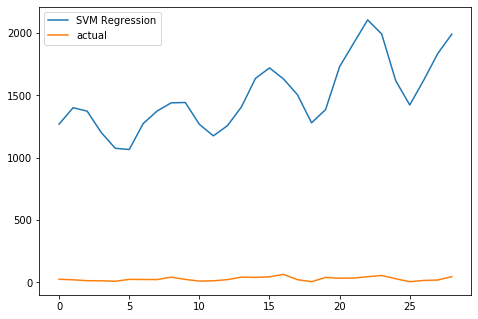

In [60]:
import pickle
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(predicted,label = 'SVM Regression')
ax.plot(y_test,label = 'actual')
ax.legend()

In [59]:
svr_linear = SVR(kernel='linear')
model1 = svr_linear.fit(X_train,y_train)
predicted = svr_linear.predict(X_test)